## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_10-14-03-23.csv', firstRow=156, lastRow=162)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_130323_S157-162.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=62s and ended at t=480s; mass=44.12695g
This equals a volume of 44.215m; expected was 44.699mL; error is 1.081%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.0025 g/s and for 2nd derivative = 0.0005625 g/s^2


<IPython.core.display.Javascript object>


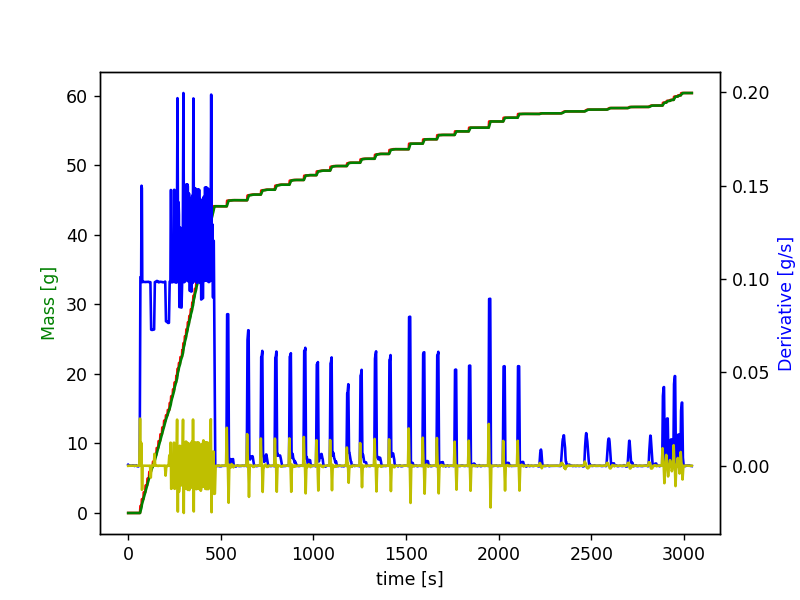

Addition of 0.879g Plantapon ACG 50 detected from 528s to 572s - expected volume = 0.777mL and actual volume = 0.784mL (resulting error is 0.918%)
Addition of 0.817g Plantacare 818 detected from 638s to 682s - expected volume = 0.919mL and actual volume = 0.753mL (resulting error is 18.022%)
Addition of 0.705g Plantacare 818 detected from 712s to 758s - expected volume = 0.591mL and actual volume = 0.65mL (resulting error is 9.938%)
Addition of 0.722g Plantacare 818 detected from 788s to 828s - expected volume = 0.591mL and actual volume = 0.666mL (resulting error is 12.637%)
Addition of 0.674g Plantacare 818 detected from 866s to 900s - expected volume = 0.603mL and actual volume = 0.626mL (resulting error is 3.754%)
Addition of 0.691g Plantacare 818 detected from 944s to 988s - expected volume = 0.603mL and actual volume = 0.641mL (resulting error is 6.292%)
Addition of 0.658g Plantacare 818 detected from 1012s to 1056s - expected volume = 0.565mL and actual volume = 0.61mL (resultin

In [17]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.003 g/s and for 2nd derivative = 0.00065625 g/s^2


<IPython.core.display.Javascript object>


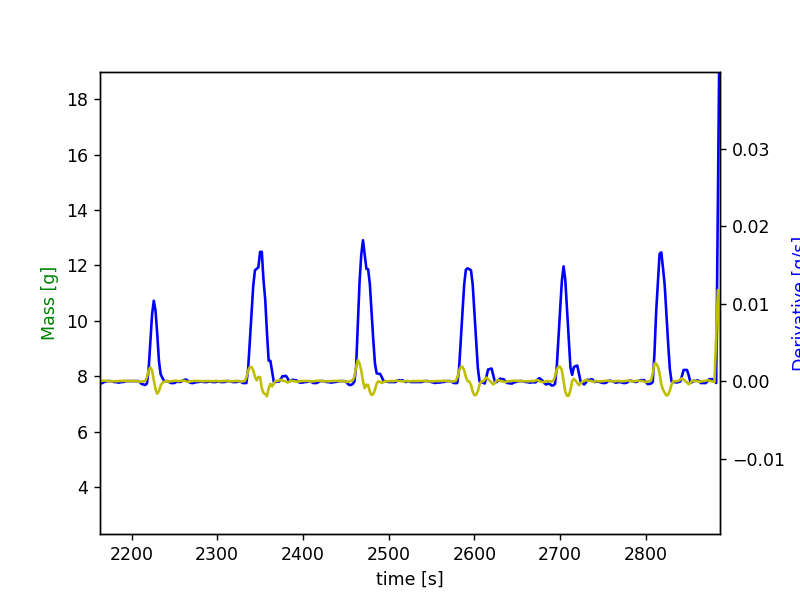

Addition of 0.088g Luviquat Excellence detected from 2218s to 2236s - expected volume = 0.095mL and actual volume = 0.08mL (resulting error is 15.385%)
Addition of 0.28g Luviquat Excellence detected from 2334s to 2368s - expected volume = 0.259mL and actual volume = 0.255mL (resulting error is 1.452%)
Addition of 0.265g Luviquat Excellence detected from 2460s to 2488s - expected volume = 0.235mL and actual volume = 0.237mL (resulting error is 0.713%)
Addition of 0.225g Luviquat Excellence detected from 2580s to 2608s - expected volume = 0.202mL and actual volume = 0.206mL (resulting error is 1.98%)
Addition of 0.151g Luviquat Excellence detected from 2694s to 2716s - expected volume = 0.138mL and actual volume = 0.138mL (resulting error is 0.166%)
Addition of 0.198g Luviquat Excellence detected from 2806s to 2832s - expected volume = 0.18mL and actual volume = 0.177mL (resulting error is 1.617%)


In [18]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=6, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.005 g/s and for 2nd derivative = 0.00125 g/s^2


<IPython.core.display.Javascript object>


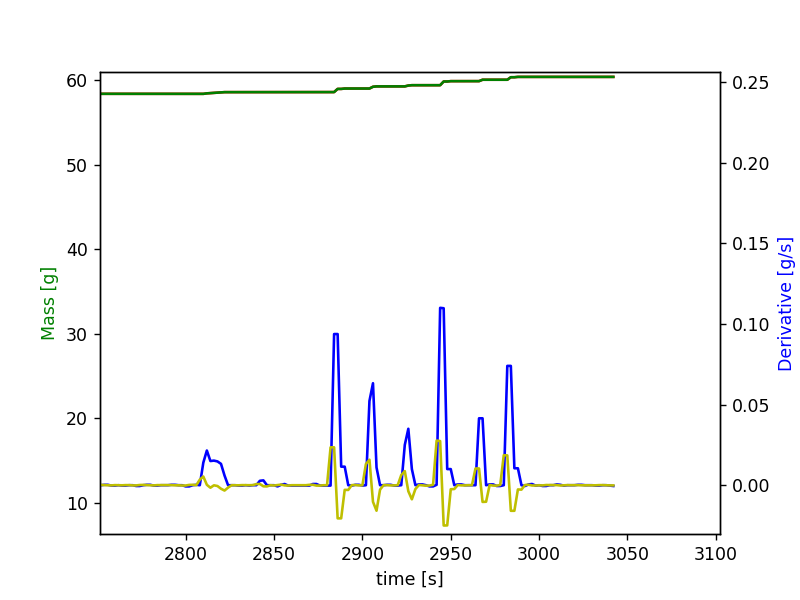

Addition of 0.419g Arlypon TT detected from 2880s to 2896s - expected volume = 0.5mL and actual volume = 0.44mL (resulting error is 11.87%)
Addition of 0.254g Arlypon TT detected from 2900s to 2914s - expected volume = 0.215mL and actual volume = 0.266mL (resulting error is 23.659%)
Addition of 0.141g Arlypon TT detected from 2920s to 2934s - expected volume = 0.105mL and actual volume = 0.145mL (resulting error is 38.235%)
Addition of 0.479g Arlypon TT detected from 2940s to 2956s - expected volume = 0.524mL and actual volume = 0.506mL (resulting error is 3.427%)
Addition of 0.168g Arlypon TT detected from 2962s to 2974s - expected volume = 0.116mL and actual volume = 0.177mL (resulting error is 52.727%)
Addition of 0.336g Arlypon TT detected from 2978s to 2994s - expected volume = 0.325mL and actual volume = 0.347mL (resulting error is 6.667%)


In [19]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=5, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [20]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_130323_S157-S162.csv', index=False)
actualMassFractions

C:\Users\ACHI01\AppData\Local\Temp\ipykernel_4556\3952794794.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for entry in sampleList[i].addedMassSeries.iteritems():


,ID,Texapon SB 3 KC,Plantapon ACG 50,Plantapon LC 7,Plantacare 818,Plantacare 2000,Dehyton MC,Dehyton PK 45,Dehyton ML,Dehyton AB 30,Plantapon Amino SCG-L,Plantapon Amino KG-L,Dehyquart A-CA,Luviquat Excellence,Dehyquart CC6,Dehyquart CC7 Benz,Salcare Super 7,Arlypon F,Arlypon TT
156,157.0,0.0,0.000,0.0,8.291622,10.497305,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.893647,0.0,0.0,0.0,0.0,4.260056
157,158.0,0.0,0.000,0.0,13.803754,0.000000,0.0,7.735404,0.0,0.000000,0.0,0.0,0.000000,2.707875,0.0,0.0,0.0,0.0,2.452689
158,159.0,0.0,0.000,0.0,0.000000,0.000000,0.0,0.000000,0.0,10.398148,0.0,0.0,8.872198,2.634851,0.0,0.0,0.0,0.0,1.402601
159,160.0,0.0,0.000,0.0,13.191859,13.317468,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,2.177628,0.0,0.0,0.0,0.0,4.628214
160,161.0,0.0,8.479,0.0,12.676057,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.458986,0.0,0.0,0.0,0.0,1.620560
161,162.0,0.0,0.000,0.0,0.000000,0.000000,0.0,12.253727,0.0,0.000000,0.0,0.0,10.527124,1.960022,0.0,0.0,0.0,0.0,3.330302
